Cloning into 'google-colab'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 106 (delta 46), reused 9 (delta 2), pack-reused 0
Receiving objects: 100% (106/106), 104.20 KiB | 334.00 KiB/s, done.
Resolving deltas: 100% (46/46), done.


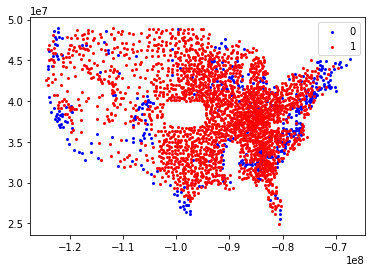

In [2]:
# We will use Poll data as an example 
# Clone the git repository with the models, data, Smart Contract
!git clone https://github.com/eshnil2000/google-colab.git
%cd google-colab/
# Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the polling data
poll_data=pd.read_csv("data/poll_data.csv")
#Convert data to list format
# The data has 3 columns: Latitude, Logitude & Party Voted in [0 indicates "Blue Party" Vote, 1 indicated "Red Party" Vote]
# Our goal is to train a Neural Network to predict the Party Voted, given the Latitude & Longitude
data= [tuple(map(lambda y: int(y), x)) for x in poll_data.values]

#prepare the data so we can plot it
scatter_x = np.array(list(map(lambda x: x[1:2][0], data)))
scatter_y = np.array(list(map(lambda x: x[:1][0], data)))

group = np.array(list(map(lambda x: x[2:3][0], data)))

cdict = {0: "blue", 1: "red"}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 4)

ax.legend()
plt.show()

In [87]:
# Let's build a simple Neural Network, which we can train on the Latitude, Longitude data
#Load the modules
import sys
sys.path.append('../google-colab/')
from dutils.neural_network import NeuralNetwork
from dutils.dataset import DemoDataset

#Build the Neural Network
#Number of neurons in input layer
il_nn=2
#Hidden layers: each element represents number of neurons in that layer
hl_nn = []
#Number of neurons in output layer
ol_nn = 2
nn = NeuralNetwork(il_nn,hl_nn,ol_nn)
nn.init_network()

[2, 2]


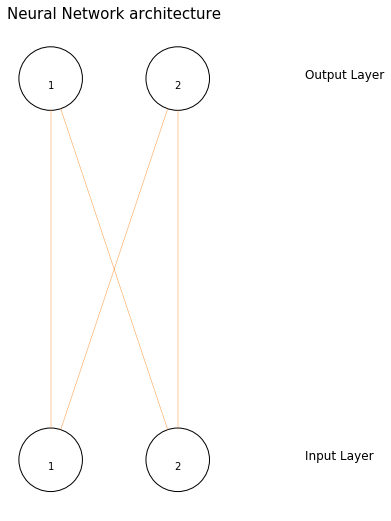

In [88]:
# Let's visualize the Neural Network we just built
#Import modules for Visualization
import dutils.VisualizeNN as VisNN
import numpy as np

# Visualize the neural Network
# Combine the input layer + hidden layers + output layers into a big matrix
network_array=[]
network_array.clear()
network_array=hl_nn
network_array.insert(0,il_nn)
network_array.append(ol_nn)

# Print the network
print(network_array)
network=VisNN.DrawNN(np.asarray(network_array))
network.draw()

In [30]:
# Separate out the input data [Latitude, Longitude] into an array batch_xs and the output data [Party] into array batch_ys

import tensorflow as tf

batch_xs=np.array([poll_data['latitude'],poll_data['longitude']])
batch_xs=batch_xs.T
yy=tf.one_hot(poll_data['party'],2)
sess = tf.Session()
batch_ys=yy.eval(session=sess)

In [34]:
print("Shape of input data: " ,batch_xs.shape,"\nShape of output data: " ,batch_ys.shape)

Shape of input data:  (2742, 2) 
Shape of output data:  (2742, 2)


In [93]:
# Let's 
NUM_STEPS = 2
MINIBATCH_SIZE = 100

x = tf.placeholder(tf.float32, [None, 2])
W = tf.Variable(tf.zeros([2, 2]))
b = tf.Variable(tf.zeros([1, 2]))
y_true = tf.placeholder(tf.float32, [None, 2])

y_pred = tf.add(tf.matmul(x, W),b)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=y_pred, labels=y_true))

gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

with tf.Session() as sess: # Train
    sess.run(tf.global_variables_initializer())
    i=0
    for _ in range(NUM_STEPS):
        
        sess.run(gd_step, feed_dict={x: batch_xs[i:i+MINIBATCH_SIZE], y_true: batch_ys[i:i+MINIBATCH_SIZE]})
        
        i=i+MINIBATCH_SIZE
        #print(i)
        # Test
        raw_prediction,true,prediction,ans = sess.run([y_pred,tf.argmax(y_true, 1),tf.argmax(y_pred, 1),accuracy], feed_dict={x: batch_xs[NUM_STEPS*MINIBATCH_SIZE:],y_true: batch_ys[NUM_STEPS*MINIBATCH_SIZE:]})
        print(sess.run(tf.argmax(raw_prediction,1)))
        #print("Accuracy: {:.4}%".format(ans*100),"Prediction:", prediction,"True:", true)
        print("Accuracy: {:.4}%".format(ans*100))
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
#print(true)
#print(raw_prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [96]:
# Connect to Ethereum node
!pip install web3
import web3
from web3 import Web3
web3 = Web3(Web3.HTTPProvider("http://supplychain.chainapp.live:9545",request_kwargs={'timeout':60}))
web3.isConnected()

True

In [97]:
accuracy_criteria = 5000 # 50.00%
total_gas_used = 0
timeout = 180
w_scale = 1000 # Scale up weights by 1000x
b_scale = 1000 # Scale up biases by 1000x

/Users/vivaan/Nilesh/Jupyterhub/data/google-colab/google-colab


In [ ]:
offer_account = web3.eth.accounts[1]
solver_account = web3.eth.accounts[2]

# Fund contract
fund_tx = web3.eth.sendTransaction({
    'from': offer_account,
    'to': danku.address,
    'value': web3.toWei(1, "ether")
})